# Starting off:

### In machine learning what is the difference between an  algorithm and a model?

*We use algorithm to create models. eg of algorithm is regression.*





# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss (*think like residuals in OLS*).

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights (*coeff*) and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

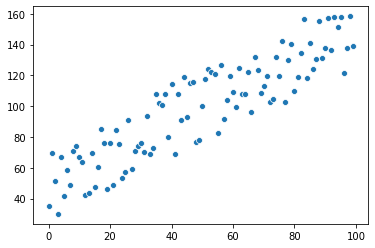

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 448.256098
Iteration 1 | Cost: 444.756635
Iteration 2 | Cost: 441.455265
Iteration 3 | Cost: 438.340493
Iteration 4 | Cost: 435.401492
Iteration 5 | Cost: 432.628061
Iteration 6 | Cost: 430.010592
Iteration 7 | Cost: 427.540037
Iteration 8 | Cost: 425.207869
Iteration 9 | Cost: 423.006059
Iteration 10 | Cost: 420.927043
Iteration 11 | Cost: 418.963696
Iteration 12 | Cost: 417.109305
Iteration 13 | Cost: 415.357550
Iteration 14 | Cost: 413.702475
Iteration 15 | Cost: 412.138470
Iteration 16 | Cost: 410.660251
Iteration 17 | Cost: 409.262842
Iteration 18 | Cost: 407.941554
Iteration 19 | Cost: 406.691970
Iteration 20 | Cost: 405.509931
Iteration 21 | Cost: 404.391518
Iteration 22 | Cost: 403.333039
Iteration 23 | Cost: 402.331019
Iteration 24 | Cost: 401.382181
Iteration 25 | Cost: 400.483441
Iteration 26 | Cost: 399.631893
Iteration 27 | Cost: 398.824799
Iteration 28 | Cost: 398.059580
Iteration 29 | Cost: 397.333809
Iteration 30 | Cost: 396.645197
Iteration 31 | Cos

Iteration 1456 | Cost: 287.478415
Iteration 1457 | Cost: 287.422767
Iteration 1458 | Cost: 287.367136
Iteration 1459 | Cost: 287.311522
Iteration 1460 | Cost: 287.255926
Iteration 1461 | Cost: 287.200346
Iteration 1462 | Cost: 287.144782
Iteration 1463 | Cost: 287.089236
Iteration 1464 | Cost: 287.033707
Iteration 1465 | Cost: 286.978195
Iteration 1466 | Cost: 286.922699
Iteration 1467 | Cost: 286.867221
Iteration 1468 | Cost: 286.811759
Iteration 1469 | Cost: 286.756314
Iteration 1470 | Cost: 286.700886
Iteration 1471 | Cost: 286.645475
Iteration 1472 | Cost: 286.590081
Iteration 1473 | Cost: 286.534704
Iteration 1474 | Cost: 286.479343
Iteration 1475 | Cost: 286.424000
Iteration 1476 | Cost: 286.368673
Iteration 1477 | Cost: 286.313363
Iteration 1478 | Cost: 286.258070
Iteration 1479 | Cost: 286.202794
Iteration 1480 | Cost: 286.147534
Iteration 1481 | Cost: 286.092292
Iteration 1482 | Cost: 286.037066
Iteration 1483 | Cost: 285.981857
Iteration 1484 | Cost: 285.926665
Iteration 1485

Iteration 2574 | Cost: 234.739364
Iteration 2575 | Cost: 234.699771
Iteration 2576 | Cost: 234.660191
Iteration 2577 | Cost: 234.620623
Iteration 2578 | Cost: 234.581066
Iteration 2579 | Cost: 234.541522
Iteration 2580 | Cost: 234.501990
Iteration 2581 | Cost: 234.462470
Iteration 2582 | Cost: 234.422962
Iteration 2583 | Cost: 234.383466
Iteration 2584 | Cost: 234.343982
Iteration 2585 | Cost: 234.304510
Iteration 2586 | Cost: 234.265050
Iteration 2587 | Cost: 234.225602
Iteration 2588 | Cost: 234.186166
Iteration 2589 | Cost: 234.146742
Iteration 2590 | Cost: 234.107330
Iteration 2591 | Cost: 234.067930
Iteration 2592 | Cost: 234.028542
Iteration 2593 | Cost: 233.989166
Iteration 2594 | Cost: 233.949802
Iteration 2595 | Cost: 233.910450
Iteration 2596 | Cost: 233.871110
Iteration 2597 | Cost: 233.831782
Iteration 2598 | Cost: 233.792466
Iteration 2599 | Cost: 233.753162
Iteration 2600 | Cost: 233.713869
Iteration 2601 | Cost: 233.674589
Iteration 2602 | Cost: 233.635321
Iteration 2603

Iteration 3803 | Cost: 194.141455
Iteration 3804 | Cost: 194.114222
Iteration 3805 | Cost: 194.086997
Iteration 3806 | Cost: 194.059781
Iteration 3807 | Cost: 194.032573
Iteration 3808 | Cost: 194.005373
Iteration 3809 | Cost: 193.978181
Iteration 3810 | Cost: 193.950997
Iteration 3811 | Cost: 193.923822
Iteration 3812 | Cost: 193.896655
Iteration 3813 | Cost: 193.869497
Iteration 3814 | Cost: 193.842346
Iteration 3815 | Cost: 193.815204
Iteration 3816 | Cost: 193.788070
Iteration 3817 | Cost: 193.760945
Iteration 3818 | Cost: 193.733827
Iteration 3819 | Cost: 193.706718
Iteration 3820 | Cost: 193.679618
Iteration 3821 | Cost: 193.652525
Iteration 3822 | Cost: 193.625441
Iteration 3823 | Cost: 193.598365
Iteration 3824 | Cost: 193.571297
Iteration 3825 | Cost: 193.544237
Iteration 3826 | Cost: 193.517186
Iteration 3827 | Cost: 193.490143
Iteration 3828 | Cost: 193.463108
Iteration 3829 | Cost: 193.436081
Iteration 3830 | Cost: 193.409063
Iteration 3831 | Cost: 193.382053
Iteration 3832

Iteration 4943 | Cost: 167.906865
Iteration 4944 | Cost: 167.887618
Iteration 4945 | Cost: 167.868378
Iteration 4946 | Cost: 167.849143
Iteration 4947 | Cost: 167.829914
Iteration 4948 | Cost: 167.810691
Iteration 4949 | Cost: 167.791473
Iteration 4950 | Cost: 167.772262
Iteration 4951 | Cost: 167.753056
Iteration 4952 | Cost: 167.733857
Iteration 4953 | Cost: 167.714663
Iteration 4954 | Cost: 167.695475
Iteration 4955 | Cost: 167.676293
Iteration 4956 | Cost: 167.657116
Iteration 4957 | Cost: 167.637946
Iteration 4958 | Cost: 167.618781
Iteration 4959 | Cost: 167.599622
Iteration 4960 | Cost: 167.580469
Iteration 4961 | Cost: 167.561322
Iteration 4962 | Cost: 167.542181
Iteration 4963 | Cost: 167.523045
Iteration 4964 | Cost: 167.503915
Iteration 4965 | Cost: 167.484792
Iteration 4966 | Cost: 167.465674
Iteration 4967 | Cost: 167.446561
Iteration 4968 | Cost: 167.427455
Iteration 4969 | Cost: 167.408354
Iteration 4970 | Cost: 167.389259
Iteration 4971 | Cost: 167.370170
Iteration 4972

Iteration 5917 | Cost: 151.682378
Iteration 5918 | Cost: 151.668071
Iteration 5919 | Cost: 151.653768
Iteration 5920 | Cost: 151.639469
Iteration 5921 | Cost: 151.625175
Iteration 5922 | Cost: 151.610885
Iteration 5923 | Cost: 151.596600
Iteration 5924 | Cost: 151.582319
Iteration 5925 | Cost: 151.568042
Iteration 5926 | Cost: 151.553769
Iteration 5927 | Cost: 151.539501
Iteration 5928 | Cost: 151.525237
Iteration 5929 | Cost: 151.510978
Iteration 5930 | Cost: 151.496723
Iteration 5931 | Cost: 151.482472
Iteration 5932 | Cost: 151.468225
Iteration 5933 | Cost: 151.453983
Iteration 5934 | Cost: 151.439745
Iteration 5935 | Cost: 151.425512
Iteration 5936 | Cost: 151.411283
Iteration 5937 | Cost: 151.397058
Iteration 5938 | Cost: 151.382838
Iteration 5939 | Cost: 151.368621
Iteration 5940 | Cost: 151.354410
Iteration 5941 | Cost: 151.340202
Iteration 5942 | Cost: 151.325999
Iteration 5943 | Cost: 151.311800
Iteration 5944 | Cost: 151.297606
Iteration 5945 | Cost: 151.283415
Iteration 5946

Iteration 6987 | Cost: 138.615170
Iteration 6988 | Cost: 138.604841
Iteration 6989 | Cost: 138.594515
Iteration 6990 | Cost: 138.584192
Iteration 6991 | Cost: 138.573872
Iteration 6992 | Cost: 138.563555
Iteration 6993 | Cost: 138.553242
Iteration 6994 | Cost: 138.542931
Iteration 6995 | Cost: 138.532624
Iteration 6996 | Cost: 138.522320
Iteration 6997 | Cost: 138.512019
Iteration 6998 | Cost: 138.501721
Iteration 6999 | Cost: 138.491426
Iteration 7000 | Cost: 138.481135
Iteration 7001 | Cost: 138.470846
Iteration 7002 | Cost: 138.460561
Iteration 7003 | Cost: 138.450279
Iteration 7004 | Cost: 138.440000
Iteration 7005 | Cost: 138.429724
Iteration 7006 | Cost: 138.419451
Iteration 7007 | Cost: 138.409181
Iteration 7008 | Cost: 138.398915
Iteration 7009 | Cost: 138.388651
Iteration 7010 | Cost: 138.378391
Iteration 7011 | Cost: 138.368134
Iteration 7012 | Cost: 138.357880
Iteration 7013 | Cost: 138.347629
Iteration 7014 | Cost: 138.337381
Iteration 7015 | Cost: 138.327136
Iteration 7016

Iteration 7787 | Cost: 131.280074
Iteration 7788 | Cost: 131.271978
Iteration 7789 | Cost: 131.263884
Iteration 7790 | Cost: 131.255793
Iteration 7791 | Cost: 131.247704
Iteration 7792 | Cost: 131.239618
Iteration 7793 | Cost: 131.231534
Iteration 7794 | Cost: 131.223452
Iteration 7795 | Cost: 131.215373
Iteration 7796 | Cost: 131.207297
Iteration 7797 | Cost: 131.199223
Iteration 7798 | Cost: 131.191151
Iteration 7799 | Cost: 131.183082
Iteration 7800 | Cost: 131.175015
Iteration 7801 | Cost: 131.166951
Iteration 7802 | Cost: 131.158889
Iteration 7803 | Cost: 131.150830
Iteration 7804 | Cost: 131.142773
Iteration 7805 | Cost: 131.134718
Iteration 7806 | Cost: 131.126666
Iteration 7807 | Cost: 131.118617
Iteration 7808 | Cost: 131.110570
Iteration 7809 | Cost: 131.102525
Iteration 7810 | Cost: 131.094483
Iteration 7811 | Cost: 131.086443
Iteration 7812 | Cost: 131.078406
Iteration 7813 | Cost: 131.070371
Iteration 7814 | Cost: 131.062339
Iteration 7815 | Cost: 131.054309
Iteration 7816

Iteration 9134 | Cost: 122.332646
Iteration 9135 | Cost: 122.327274
Iteration 9136 | Cost: 122.321903
Iteration 9137 | Cost: 122.316534
Iteration 9138 | Cost: 122.311166
Iteration 9139 | Cost: 122.305800
Iteration 9140 | Cost: 122.300436
Iteration 9141 | Cost: 122.295074
Iteration 9142 | Cost: 122.289713
Iteration 9143 | Cost: 122.284353
Iteration 9144 | Cost: 122.278996
Iteration 9145 | Cost: 122.273640
Iteration 9146 | Cost: 122.268285
Iteration 9147 | Cost: 122.262932
Iteration 9148 | Cost: 122.257581
Iteration 9149 | Cost: 122.252232
Iteration 9150 | Cost: 122.246884
Iteration 9151 | Cost: 122.241538
Iteration 9152 | Cost: 122.236193
Iteration 9153 | Cost: 122.230850
Iteration 9154 | Cost: 122.225509
Iteration 9155 | Cost: 122.220169
Iteration 9156 | Cost: 122.214831
Iteration 9157 | Cost: 122.209494
Iteration 9158 | Cost: 122.204159
Iteration 9159 | Cost: 122.198826
Iteration 9160 | Cost: 122.193494
Iteration 9161 | Cost: 122.188164
Iteration 9162 | Cost: 122.182836
Iteration 9163

Iteration 10152 | Cost: 117.629255
Iteration 10153 | Cost: 117.625315
Iteration 10154 | Cost: 117.621375
Iteration 10155 | Cost: 117.617437
Iteration 10156 | Cost: 117.613500
Iteration 10157 | Cost: 117.609565
Iteration 10158 | Cost: 117.605630
Iteration 10159 | Cost: 117.601697
Iteration 10160 | Cost: 117.597765
Iteration 10161 | Cost: 117.593834
Iteration 10162 | Cost: 117.589904
Iteration 10163 | Cost: 117.585975
Iteration 10164 | Cost: 117.582048
Iteration 10165 | Cost: 117.578122
Iteration 10166 | Cost: 117.574197
Iteration 10167 | Cost: 117.570273
Iteration 10168 | Cost: 117.566351
Iteration 10169 | Cost: 117.562429
Iteration 10170 | Cost: 117.558509
Iteration 10171 | Cost: 117.554590
Iteration 10172 | Cost: 117.550672
Iteration 10173 | Cost: 117.546756
Iteration 10174 | Cost: 117.542840
Iteration 10175 | Cost: 117.538926
Iteration 10176 | Cost: 117.535013
Iteration 10177 | Cost: 117.531101
Iteration 10178 | Cost: 117.527191
Iteration 10179 | Cost: 117.523281
Iteration 10180 | Co

Iteration 11176 | Cost: 114.162091
Iteration 11177 | Cost: 114.159206
Iteration 11178 | Cost: 114.156322
Iteration 11179 | Cost: 114.153439
Iteration 11180 | Cost: 114.150557
Iteration 11181 | Cost: 114.147675
Iteration 11182 | Cost: 114.144794
Iteration 11183 | Cost: 114.141915
Iteration 11184 | Cost: 114.139036
Iteration 11185 | Cost: 114.136158
Iteration 11186 | Cost: 114.133281
Iteration 11187 | Cost: 114.130404
Iteration 11188 | Cost: 114.127529
Iteration 11189 | Cost: 114.124655
Iteration 11190 | Cost: 114.121781
Iteration 11191 | Cost: 114.118908
Iteration 11192 | Cost: 114.116036
Iteration 11193 | Cost: 114.113165
Iteration 11194 | Cost: 114.110295
Iteration 11195 | Cost: 114.107426
Iteration 11196 | Cost: 114.104558
Iteration 11197 | Cost: 114.101690
Iteration 11198 | Cost: 114.098824
Iteration 11199 | Cost: 114.095958
Iteration 11200 | Cost: 114.093093
Iteration 11201 | Cost: 114.090229
Iteration 11202 | Cost: 114.087366
Iteration 11203 | Cost: 114.084504
Iteration 11204 | Co

Iteration 12262 | Cost: 111.493893
Iteration 12263 | Cost: 111.491821
Iteration 12264 | Cost: 111.489749
Iteration 12265 | Cost: 111.487677
Iteration 12266 | Cost: 111.485606
Iteration 12267 | Cost: 111.483536
Iteration 12268 | Cost: 111.481467
Iteration 12269 | Cost: 111.479398
Iteration 12270 | Cost: 111.477329
Iteration 12271 | Cost: 111.475262
Iteration 12272 | Cost: 111.473195
Iteration 12273 | Cost: 111.471128
Iteration 12274 | Cost: 111.469062
Iteration 12275 | Cost: 111.466997
Iteration 12276 | Cost: 111.464933
Iteration 12277 | Cost: 111.462869
Iteration 12278 | Cost: 111.460805
Iteration 12279 | Cost: 111.458743
Iteration 12280 | Cost: 111.456681
Iteration 12281 | Cost: 111.454619
Iteration 12282 | Cost: 111.452559
Iteration 12283 | Cost: 111.450498
Iteration 12284 | Cost: 111.448439
Iteration 12285 | Cost: 111.446380
Iteration 12286 | Cost: 111.444322
Iteration 12287 | Cost: 111.442264
Iteration 12288 | Cost: 111.440207
Iteration 12289 | Cost: 111.438151
Iteration 12290 | Co

Iteration 13321 | Cost: 109.617310
Iteration 13322 | Cost: 109.615809
Iteration 13323 | Cost: 109.614308
Iteration 13324 | Cost: 109.612807
Iteration 13325 | Cost: 109.611307
Iteration 13326 | Cost: 109.609808
Iteration 13327 | Cost: 109.608309
Iteration 13328 | Cost: 109.606810
Iteration 13329 | Cost: 109.605312
Iteration 13330 | Cost: 109.603814
Iteration 13331 | Cost: 109.602316
Iteration 13332 | Cost: 109.600820
Iteration 13333 | Cost: 109.599323
Iteration 13334 | Cost: 109.597827
Iteration 13335 | Cost: 109.596332
Iteration 13336 | Cost: 109.594837
Iteration 13337 | Cost: 109.593342
Iteration 13338 | Cost: 109.591848
Iteration 13339 | Cost: 109.590354
Iteration 13340 | Cost: 109.588861
Iteration 13341 | Cost: 109.587368
Iteration 13342 | Cost: 109.585876
Iteration 13343 | Cost: 109.584384
Iteration 13344 | Cost: 109.582893
Iteration 13345 | Cost: 109.581402
Iteration 13346 | Cost: 109.579911
Iteration 13347 | Cost: 109.578421
Iteration 13348 | Cost: 109.576931
Iteration 13349 | Co

Iteration 14262 | Cost: 108.388645
Iteration 14263 | Cost: 108.387517
Iteration 14264 | Cost: 108.386390
Iteration 14265 | Cost: 108.385264
Iteration 14266 | Cost: 108.384137
Iteration 14267 | Cost: 108.383011
Iteration 14268 | Cost: 108.381885
Iteration 14269 | Cost: 108.380760
Iteration 14270 | Cost: 108.379635
Iteration 14271 | Cost: 108.378510
Iteration 14272 | Cost: 108.377386
Iteration 14273 | Cost: 108.376262
Iteration 14274 | Cost: 108.375139
Iteration 14275 | Cost: 108.374015
Iteration 14276 | Cost: 108.372892
Iteration 14277 | Cost: 108.371770
Iteration 14278 | Cost: 108.370647
Iteration 14279 | Cost: 108.369526
Iteration 14280 | Cost: 108.368404
Iteration 14281 | Cost: 108.367283
Iteration 14282 | Cost: 108.366162
Iteration 14283 | Cost: 108.365041
Iteration 14284 | Cost: 108.363921
Iteration 14285 | Cost: 108.362801
Iteration 14286 | Cost: 108.361682
Iteration 14287 | Cost: 108.360562
Iteration 14288 | Cost: 108.359444
Iteration 14289 | Cost: 108.358325
Iteration 14290 | Co

Iteration 15566 | Cost: 107.175102
Iteration 15567 | Cost: 107.174344
Iteration 15568 | Cost: 107.173586
Iteration 15569 | Cost: 107.172829
Iteration 15570 | Cost: 107.172072
Iteration 15571 | Cost: 107.171315
Iteration 15572 | Cost: 107.170558
Iteration 15573 | Cost: 107.169801
Iteration 15574 | Cost: 107.169045
Iteration 15575 | Cost: 107.168289
Iteration 15576 | Cost: 107.167533
Iteration 15577 | Cost: 107.166777
Iteration 15578 | Cost: 107.166022
Iteration 15579 | Cost: 107.165267
Iteration 15580 | Cost: 107.164512
Iteration 15581 | Cost: 107.163757
Iteration 15582 | Cost: 107.163002
Iteration 15583 | Cost: 107.162248
Iteration 15584 | Cost: 107.161494
Iteration 15585 | Cost: 107.160740
Iteration 15586 | Cost: 107.159987
Iteration 15587 | Cost: 107.159233
Iteration 15588 | Cost: 107.158480
Iteration 15589 | Cost: 107.157727
Iteration 15590 | Cost: 107.156975
Iteration 15591 | Cost: 107.156222
Iteration 15592 | Cost: 107.155470
Iteration 15593 | Cost: 107.154718
Iteration 15594 | Co

Iteration 16709 | Cost: 106.443327
Iteration 16710 | Cost: 106.442791
Iteration 16711 | Cost: 106.442256
Iteration 16712 | Cost: 106.441722
Iteration 16713 | Cost: 106.441187
Iteration 16714 | Cost: 106.440652
Iteration 16715 | Cost: 106.440118
Iteration 16716 | Cost: 106.439584
Iteration 16717 | Cost: 106.439050
Iteration 16718 | Cost: 106.438516
Iteration 16719 | Cost: 106.437982
Iteration 16720 | Cost: 106.437448
Iteration 16721 | Cost: 106.436915
Iteration 16722 | Cost: 106.436382
Iteration 16723 | Cost: 106.435849
Iteration 16724 | Cost: 106.435316
Iteration 16725 | Cost: 106.434783
Iteration 16726 | Cost: 106.434251
Iteration 16727 | Cost: 106.433718
Iteration 16728 | Cost: 106.433186
Iteration 16729 | Cost: 106.432654
Iteration 16730 | Cost: 106.432122
Iteration 16731 | Cost: 106.431590
Iteration 16732 | Cost: 106.431058
Iteration 16733 | Cost: 106.430527
Iteration 16734 | Cost: 106.429996
Iteration 16735 | Cost: 106.429465
Iteration 16736 | Cost: 106.428934
Iteration 16737 | Co

Iteration 17881 | Cost: 105.915717
Iteration 17882 | Cost: 105.915343
Iteration 17883 | Cost: 105.914968
Iteration 17884 | Cost: 105.914594
Iteration 17885 | Cost: 105.914220
Iteration 17886 | Cost: 105.913846
Iteration 17887 | Cost: 105.913472
Iteration 17888 | Cost: 105.913098
Iteration 17889 | Cost: 105.912724
Iteration 17890 | Cost: 105.912350
Iteration 17891 | Cost: 105.911977
Iteration 17892 | Cost: 105.911603
Iteration 17893 | Cost: 105.911230
Iteration 17894 | Cost: 105.910857
Iteration 17895 | Cost: 105.910484
Iteration 17896 | Cost: 105.910111
Iteration 17897 | Cost: 105.909738
Iteration 17898 | Cost: 105.909365
Iteration 17899 | Cost: 105.908992
Iteration 17900 | Cost: 105.908620
Iteration 17901 | Cost: 105.908248
Iteration 17902 | Cost: 105.907875
Iteration 17903 | Cost: 105.907503
Iteration 17904 | Cost: 105.907131
Iteration 17905 | Cost: 105.906759
Iteration 17906 | Cost: 105.906387
Iteration 17907 | Cost: 105.906015
Iteration 17908 | Cost: 105.905644
Iteration 17909 | Co

Iteration 18636 | Cost: 105.663032
Iteration 18637 | Cost: 105.662734
Iteration 18638 | Cost: 105.662437
Iteration 18639 | Cost: 105.662139
Iteration 18640 | Cost: 105.661842
Iteration 18641 | Cost: 105.661545
Iteration 18642 | Cost: 105.661248
Iteration 18643 | Cost: 105.660950
Iteration 18644 | Cost: 105.660653
Iteration 18645 | Cost: 105.660356
Iteration 18646 | Cost: 105.660060
Iteration 18647 | Cost: 105.659763
Iteration 18648 | Cost: 105.659466
Iteration 18649 | Cost: 105.659170
Iteration 18650 | Cost: 105.658873
Iteration 18651 | Cost: 105.658577
Iteration 18652 | Cost: 105.658281
Iteration 18653 | Cost: 105.657984
Iteration 18654 | Cost: 105.657688
Iteration 18655 | Cost: 105.657392
Iteration 18656 | Cost: 105.657096
Iteration 18657 | Cost: 105.656801
Iteration 18658 | Cost: 105.656505
Iteration 18659 | Cost: 105.656209
Iteration 18660 | Cost: 105.655914
Iteration 18661 | Cost: 105.655618
Iteration 18662 | Cost: 105.655323
Iteration 18663 | Cost: 105.655027
Iteration 18664 | Co

Iteration 19861 | Cost: 105.358651
Iteration 19862 | Cost: 105.358446
Iteration 19863 | Cost: 105.358241
Iteration 19864 | Cost: 105.358036
Iteration 19865 | Cost: 105.357832
Iteration 19866 | Cost: 105.357627
Iteration 19867 | Cost: 105.357422
Iteration 19868 | Cost: 105.357218
Iteration 19869 | Cost: 105.357013
Iteration 19870 | Cost: 105.356809
Iteration 19871 | Cost: 105.356604
Iteration 19872 | Cost: 105.356400
Iteration 19873 | Cost: 105.356195
Iteration 19874 | Cost: 105.355991
Iteration 19875 | Cost: 105.355787
Iteration 19876 | Cost: 105.355583
Iteration 19877 | Cost: 105.355379
Iteration 19878 | Cost: 105.355175
Iteration 19879 | Cost: 105.354971
Iteration 19880 | Cost: 105.354767
Iteration 19881 | Cost: 105.354563
Iteration 19882 | Cost: 105.354360
Iteration 19883 | Cost: 105.354156
Iteration 19884 | Cost: 105.353952
Iteration 19885 | Cost: 105.353749
Iteration 19886 | Cost: 105.353545
Iteration 19887 | Cost: 105.353342
Iteration 19888 | Cost: 105.353139
Iteration 19889 | Co

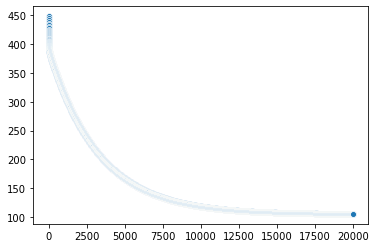

In [6]:
numEpochs= 20000 # number of steps or iterations to training the model
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)
# play with the google link

The step size = -grad * learning rate
The step size gets smaller and smaller at each iteration even though the learning rate is the same. Therefore the size of the step taken is dependent upon the size of the gradient. 

**Relook at this part of the lecture video.... More notes need to be collected here.**

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

*If using GD algorithm. you want to scale your data features to help the GD algo optimize or find the optimal cost as efficiently as possible. In the second graph below the scale of theta 1 to theta 2 is much wider or larger and it is much harder for the GD algo to reach optimal cost. Scaling her becomes imperative here to help make this process efficient*

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.
*How many times do you go through the entire data set.*

#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

*Can change your batch size and you epochs*

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise